In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.shape : rows and columns

In [3]:
df = pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')
df.shape

(11251, 15)

df.head() : top 5 rows

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


df.info() provides not null count and Dtype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


DATA CLEANING

In [6]:
df.drop(["Status", "unnamed1"],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


EXPLORATORY DATA ANALYSIS

Gender

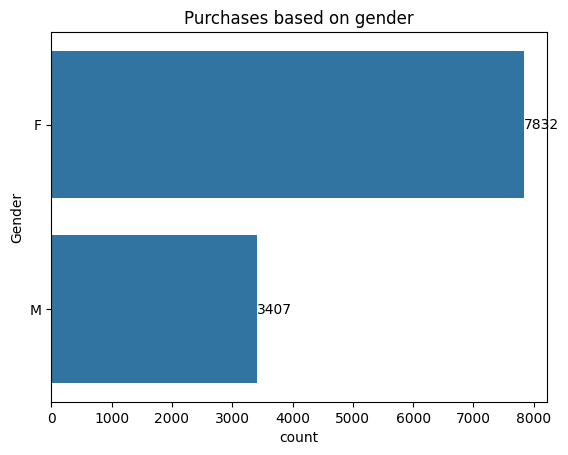

In [12]:
gender_vis = sns.countplot(y="Gender", data=df)
gender_vis.set(title='Purchases based on gender')

for bars in gender_vis.containers:
    gender_vis.bar_label(bars)

For now it is evident that Female has buyed much more products than Male, more than twice

Now it is questionable that how much money they have spend

In [13]:
df.groupby(['Gender'])['Amount'].sum()

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64

In [14]:
from matplotlib.ticker import FuncFormatter

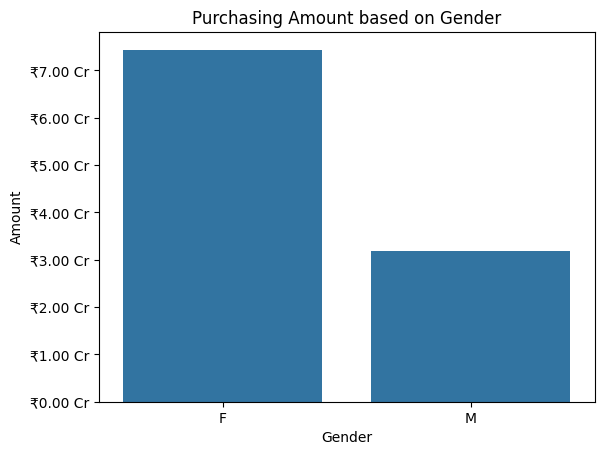

In [15]:
gender_pur = df.groupby(['Gender'])['Amount'].sum().reset_index()
gender_pur_vis=sns.barplot(x='Gender', y='Amount', data = gender_pur)
gender_pur_vis.set(title = 'Purchasing Amount based on Gender')

def crore_formatter(x,pos):
    return f'₹{x/1e7:.2f} Cr'

gender_pur_vis.yaxis.set_major_formatter(FuncFormatter(crore_formatter))

It is now evident that female's purchasing power is way higher than male purchasing power, more than twice

AGE

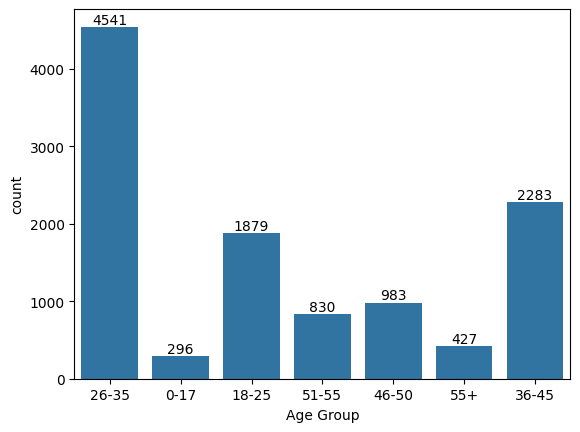

In [16]:
age_vis = sns.countplot(x='Age Group',data = df)

for bars in age_vis.containers:
    age_vis.bar_label(bars)

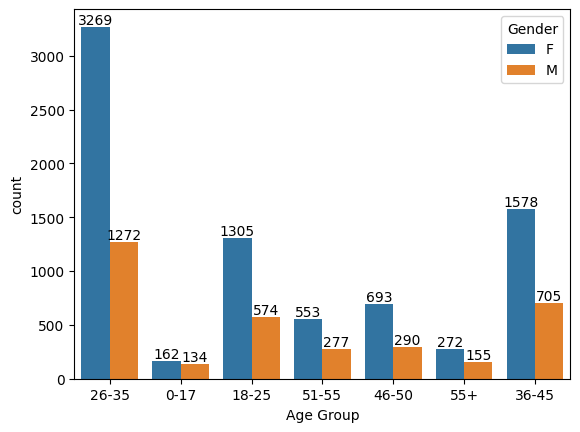

In [17]:
age_vis = sns.countplot(x='Age Group',hue='Gender',data = df)

for bars in age_vis.containers:
    age_vis.bar_label(bars)

In [18]:
age_amount = df.groupby(['Age Group'])['Amount'].sum().reset_index()
age_amount.sort_values(by='Amount',ascending=False,inplace=True)

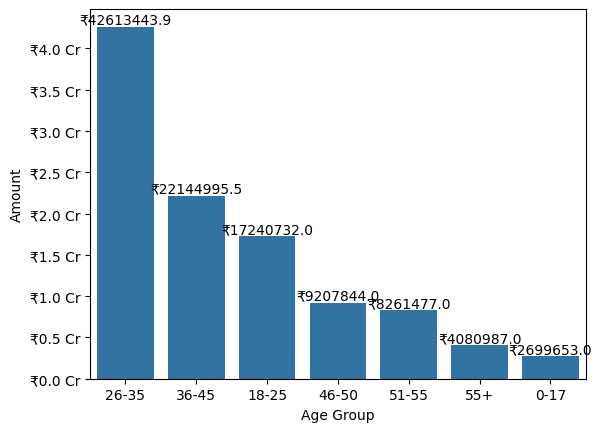

In [19]:
age_amount_vis=sns.barplot(x='Age Group', y = 'Amount', data = age_amount)

def crore_formatter(x,pos):
    return f'₹{x/1e7:.1f} Cr'

age_amount_vis.yaxis.set_major_formatter(FuncFormatter(crore_formatter))

for bars in age_amount_vis.containers:
    age_amount_vis.bar_label(bars,fmt='₹{:.1f}',label_type='edge')



From above graph we can see that age group of 26-35 had buyed most items and spent more money than any other age group and amongst these Female had purchesed more items compared to Male.

STATE

In [20]:
sales_state = df.groupby(['State'])['Orders'].sum().reset_index()
sales_state.sort_values(by = 'Orders',ascending=False,inplace=True,ignore_index=True)
sales_state_10=sales_state.head(10)

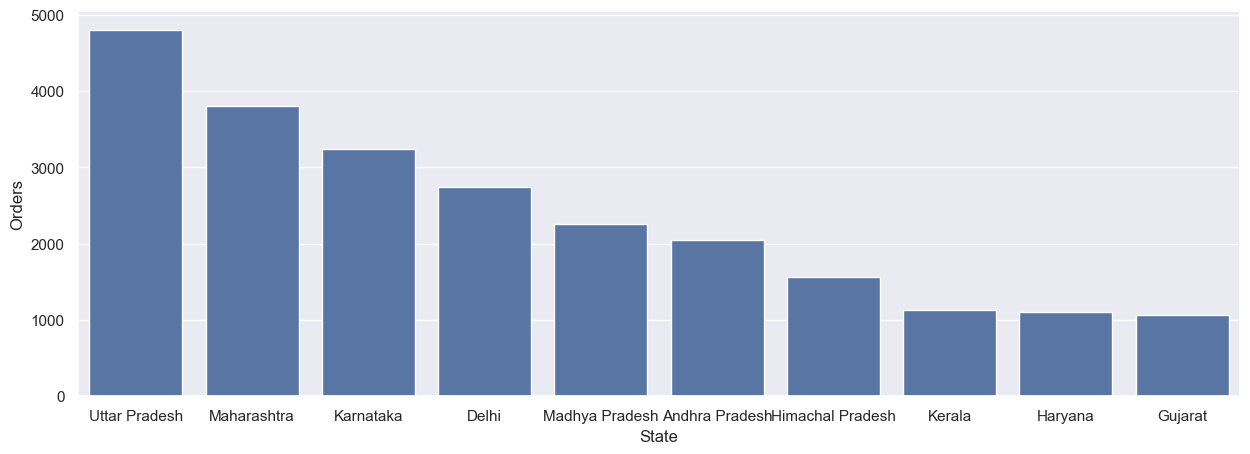

In [21]:
sns.set(rc={"figure.figsize":(15,5)})
sales_state_vis = sns.barplot(x='State',y='Orders',data=sales_state_10)

In [22]:
sales_rate = df.groupby(['State'])['Amount'].sum().reset_index()
sales_rate.sort_values(by='Amount',ascending=False,inplace=True,ignore_index=True)
sales_rate_10 = sales_rate.head(10)

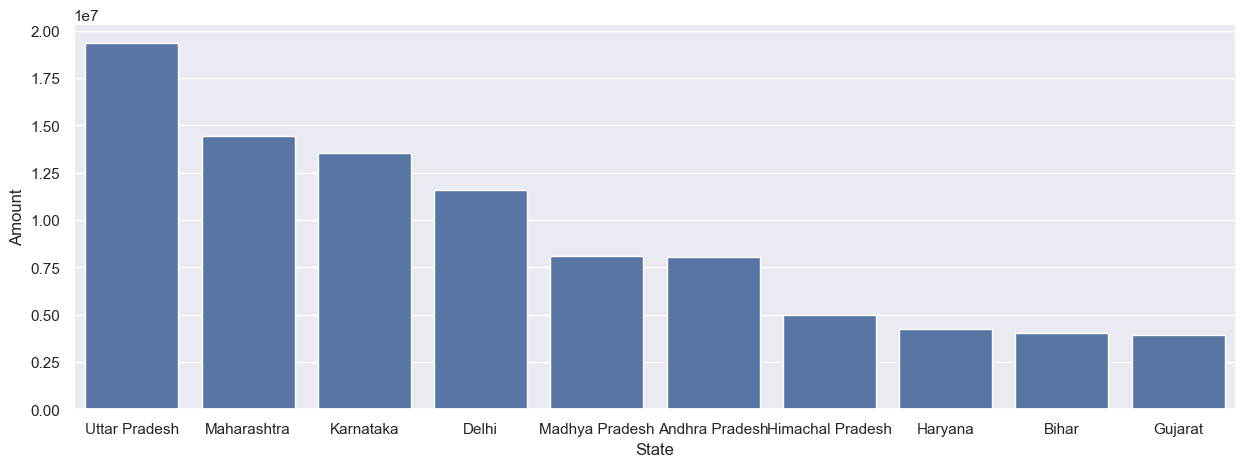

In [23]:
sales_rate_vis = sns.barplot(x='State',y='Amount',data = sales_rate_10)

Most number and amount of sales was from state Uttar pradesh, Maharastra and Karnataka. 

MARTIAL STATUS

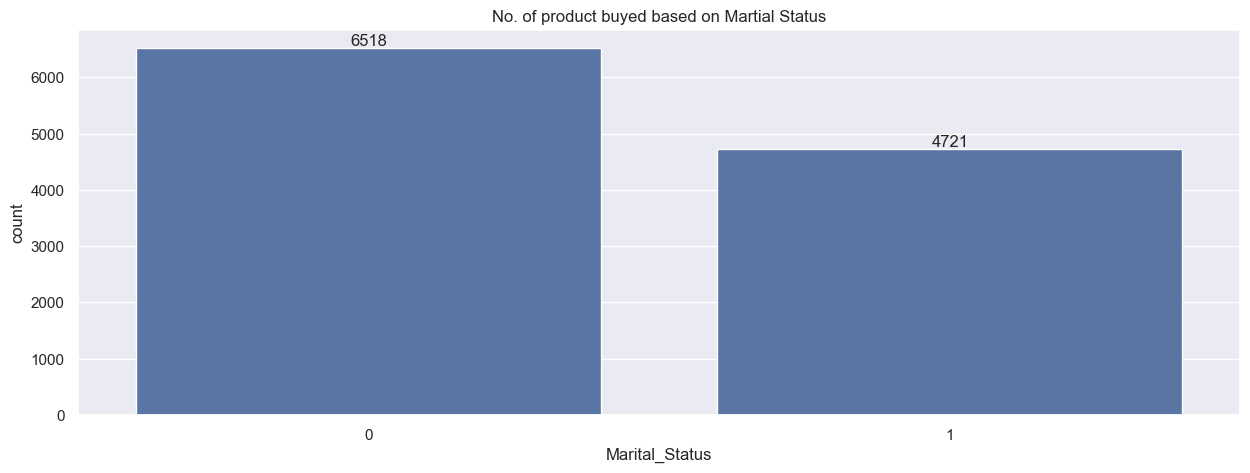

In [24]:
MartialStatus_count = sns.countplot(x='Marital_Status', data =  df)
MartialStatus_count.set(title='No. of product buyed based on Martial Status')
for bars in MartialStatus_count.containers:
    MartialStatus_count.bar_label(bars)

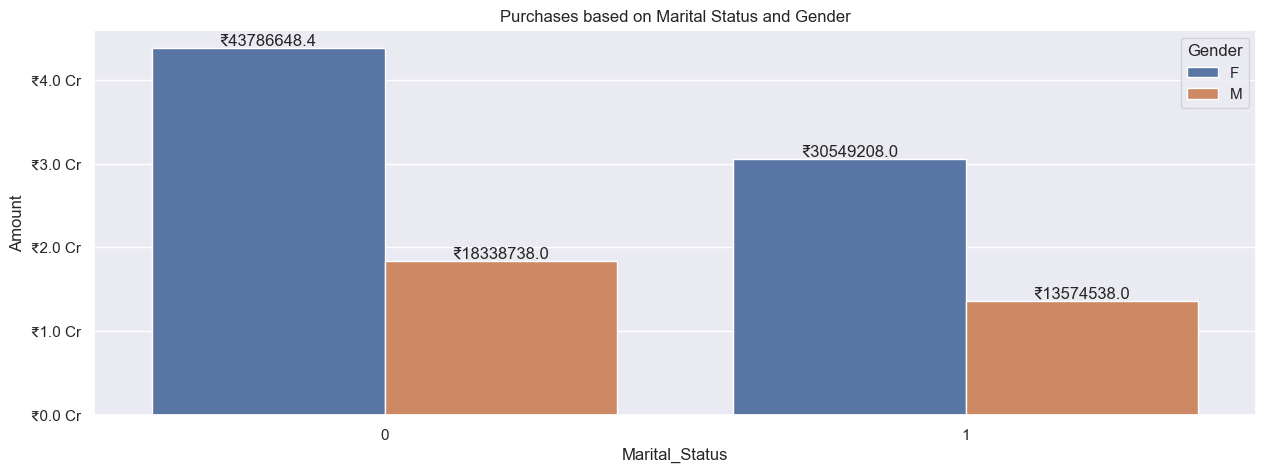

In [25]:
MartialStatus_amount = df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
MartialStatus_amount.sort_values(by="Amount",inplace=True,ascending=False,ignore_index=True)
MartialStatus_amount_vis = sns.barplot(data=MartialStatus_amount,x='Marital_Status',y='Amount',hue = 'Gender')
MartialStatus_amount_vis.set(title = 'Purchases based on Marital Status and Gender')
MartialStatus_amount_vis.yaxis.set_major_formatter(FuncFormatter(crore_formatter))
for bars in MartialStatus_amount_vis.containers:
    MartialStatus_amount_vis.bar_label(bars,fmt='₹{:.1f}',label_type='edge')


From above charts we can say that married women have most purchasing power.

OCCUPATION

In [26]:
occupation_df = df.groupby(['Occupation'])["Amount"].sum().reset_index()
occupation_df.sort_values(by='Amount',inplace=True,ascending=False,ignore_index=True)

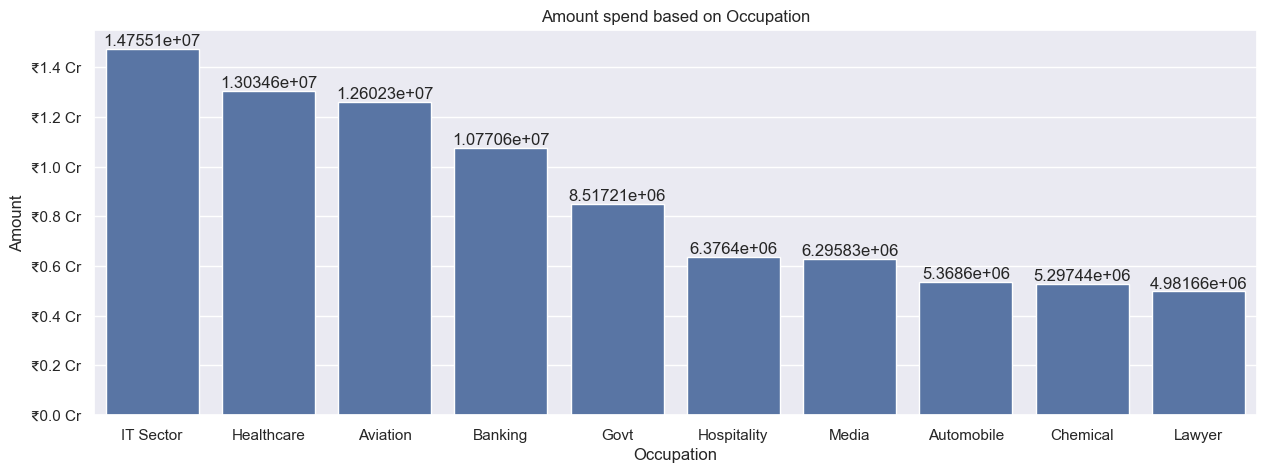

In [27]:
occupation_df_vis = sns.barplot(data=occupation_df.head(10),x='Occupation',y="Amount")
occupation_df_vis.set(title = 'Amount spend based on Occupation')
occupation_df_vis.yaxis.set_major_formatter(FuncFormatter(crore_formatter))
for bars in occupation_df_vis.containers:
    occupation_df_vis.bar_label(bars)


PRODUCT CATEGORIES

In [31]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002380,Swati,P00051642,F,26-35,33,1,Madhya Pradesh,Central,IT Sector,Veterinary,3,1064.0
1,1002323,Parakh,P00110842,F,36-45,43,1,Delhi,Central,Food Processing,Veterinary,3,1397.0
2,1001579,Victor,P00003942,F,26-35,26,1,Madhya Pradesh,Central,IT Sector,Veterinary,3,1402.0
3,1003929,Prajakta,P00323942,F,26-35,31,0,Delhi,Central,Aviation,Veterinary,3,1403.0
4,1005282,Hood,P00189842,M,18-25,25,0,Madhya Pradesh,Central,Construction,Veterinary,4,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11234,1000121,Elliston,P00110942,F,36-45,38,0,Andhra Pradesh,Southern,Govt,Auto,3,18770.0
11235,1004085,Frazer,P00347142,M,26-35,27,0,Kerala,Southern,Healthcare,Auto,3,18688.0
11236,1001051,Aastha,P00111042,M,26-35,30,1,Madhya Pradesh,Central,Banking,Auto,2,18685.0
11237,1004452,Sorensen,P00173542,M,26-35,30,0,Jharkhand,Eastern,Hospitality,Auto,1,18679.0


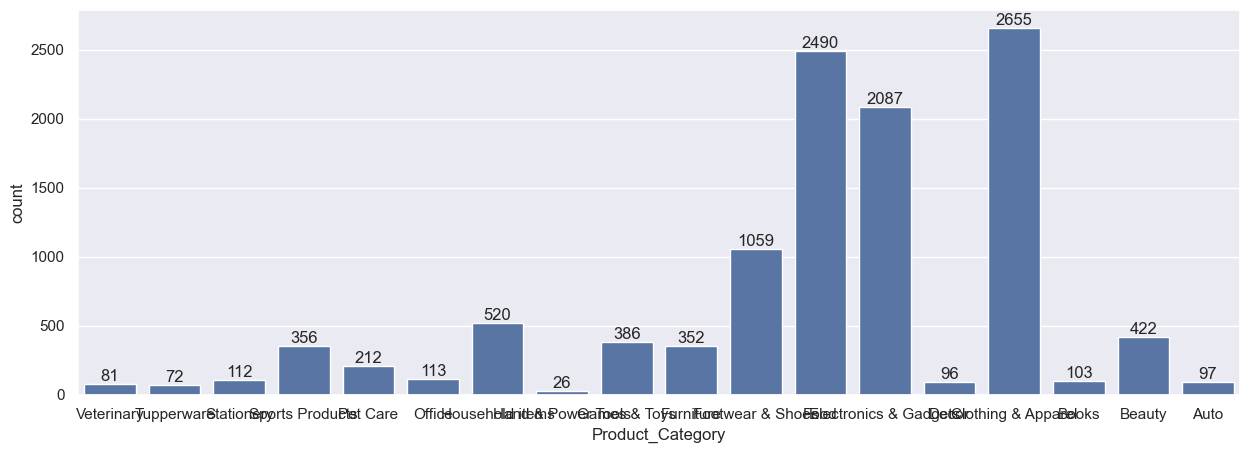

In [58]:
count_Product_categories = sns.countplot(data= df,x='Product_Category')
for bars in count_Product_categories.containers:
    count_Product_categories.bar_label(bars)

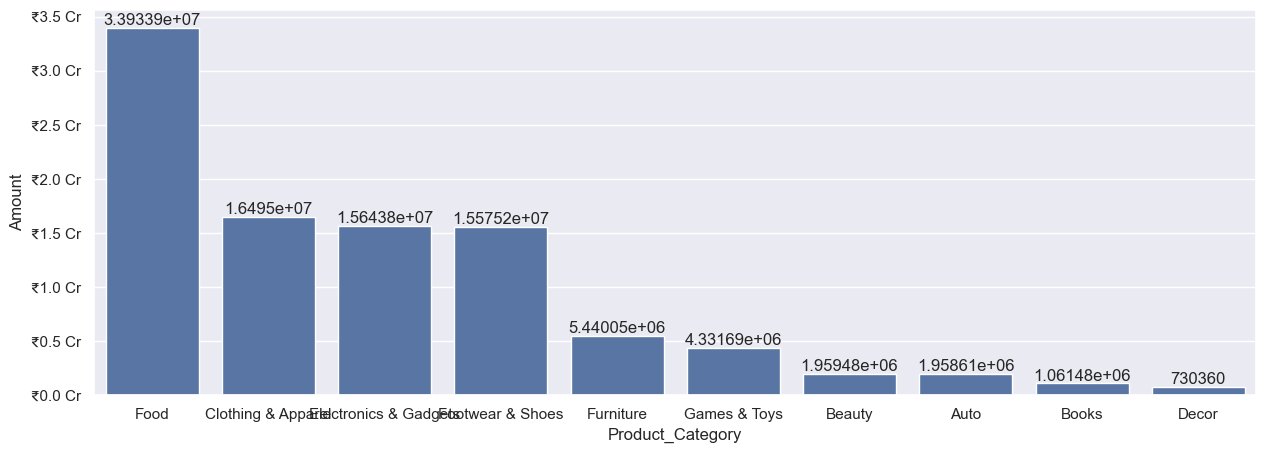

In [50]:
amount_Product_categories = df.groupby(['Product_Category'])['Amount'].sum().reset_index().head(10)
amount_Product_categories.sort_values(by='Amount',inplace=True,ascending=False,ignore_index=True)
amount_Product_categories_vis = sns.barplot(data=amount_Product_categories,x='Product_Category',y='Amount')

amount_Product_categories_vis.yaxis.set_major_formatter(FuncFormatter(crore_formatter))

for bars in amount_Product_categories_vis.containers:
    amount_Product_categories_vis.bar_label(bars)



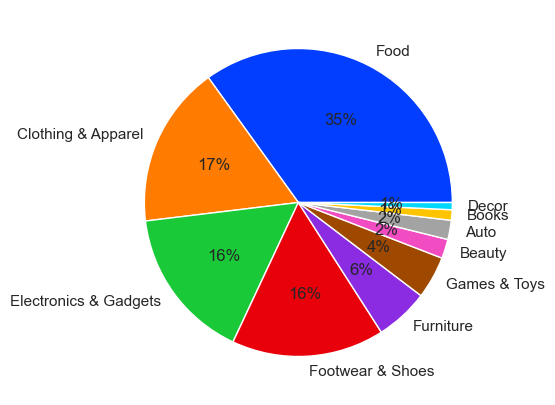

In [56]:
amount_Product_categories_pie = plt.pie(x=amount_Product_categories['Amount'],labels=amount_Product_categories['Product_Category'],colors=sns.color_palette('bright'), autopct='%.0f%%')

By this it is confimed that most spending were on food and accounts of 1/3 of total amount.

Product_ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

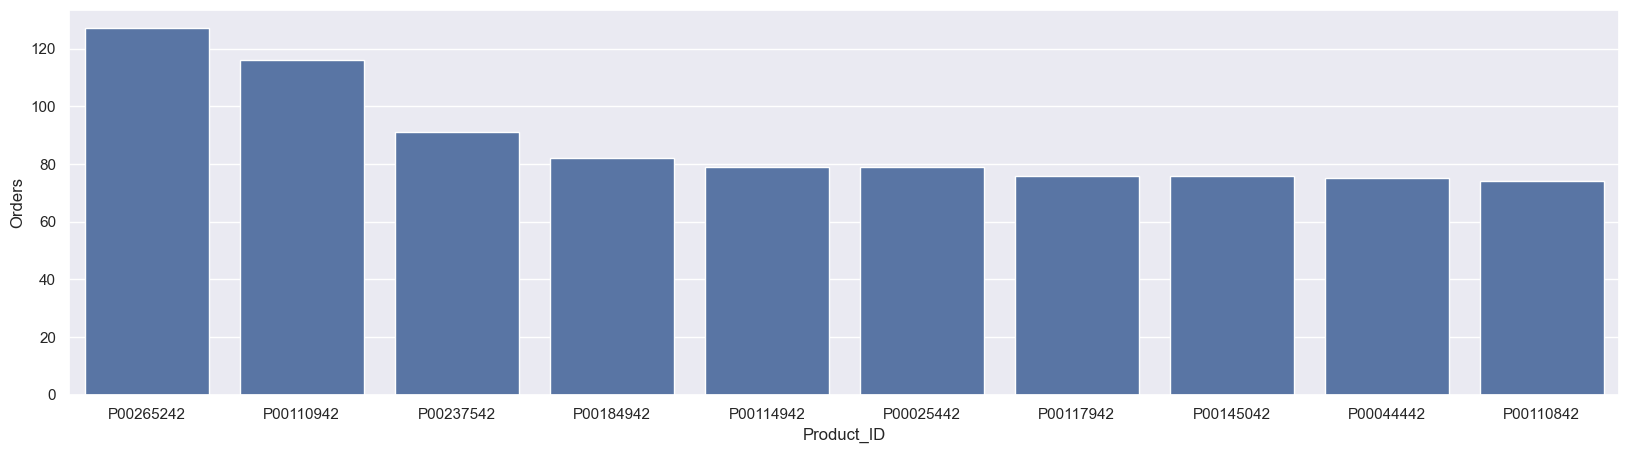

In [60]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

CONCLUSION

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

